**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 19.7 MB/s eta 0:00:00


**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [3]:
base = pd.read_csv('/content/sample_data/restaurante.csv', sep=';')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [4]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [5]:
base

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


In [6]:
base.head(3)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim


In [7]:
base.tail(2)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
10,Nao,Nao,Nao,Nao,Nenhum,R,Nao,Nao,Tailandes,0-10,Nao
11,Sim,Sim,Sim,Sim,Cheio,R,Nao,Nao,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [8]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6]))

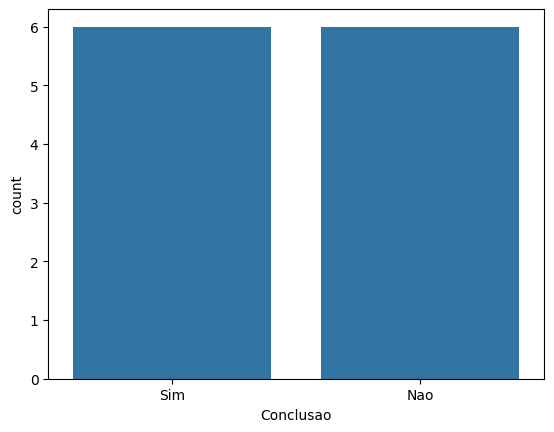

In [9]:
sns.countplot(x = base[Classificação]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Alternativo', 'Bar', 'SexSab','fome', 'Cliente','Preco', 'Chuva', 'Res','Tempo']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [12]:
base

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,1,0,0,1,0,2,0,1,Frances,0,Sim
1,1,0,0,1,1,0,0,0,Tailandes,2,Nao
2,0,1,0,0,0,0,0,0,Hamburger,0,Sim
3,1,0,1,1,1,0,1,0,Tailandes,1,Sim
4,1,0,1,0,1,2,0,1,Frances,3,Nao
5,0,1,0,1,0,1,1,1,Italiano,0,Sim
6,0,1,0,0,2,0,1,0,Hamburger,0,Nao
7,0,0,0,1,0,1,1,1,Tailandes,0,Sim
8,0,1,1,0,1,0,1,0,Hamburger,3,Nao
9,1,1,1,1,1,2,0,1,Italiano,1,Nao




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [13]:
len(np.unique(base['Cliente']))

3

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
cols_onehot_encode = ['Tipo']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [16]:
base_encoded

,Tipo_Frances,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandes,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tempo,Conclusao
0,1.0,0.0,0.0,0.0,1,0,0,1,0,2,0,1,0,Sim
1,0.0,0.0,0.0,1.0,1,0,0,1,1,0,0,0,2,Nao
2,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,Sim
3,0.0,0.0,0.0,1.0,1,0,1,1,1,0,1,0,1,Sim
4,1.0,0.0,0.0,0.0,1,0,1,0,1,2,0,1,3,Nao
5,0.0,0.0,1.0,0.0,0,1,0,1,0,1,1,1,0,Sim
6,0.0,1.0,0.0,0.0,0,1,0,0,2,0,1,0,0,Nao
7,0.0,0.0,0.0,1.0,0,0,0,1,0,1,1,1,0,Sim
8,0.0,1.0,0.0,0.0,0,1,1,0,1,0,1,0,3,Nao
9,0.0,0.0,1.0,0.0,1,1,1,1,1,2,0,1,1,Nao


In [17]:
base_encoded.shape

(12, 14)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [18]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_prev

,Tipo_Frances,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandes,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tempo
0,1.0,0.0,0.0,0.0,1,0,0,1,0,2,0,1,0
1,0.0,0.0,0.0,1.0,1,0,0,1,1,0,0,0,2
2,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,1.0,1,0,1,1,1,0,1,0,1
4,1.0,0.0,0.0,0.0,1,0,1,0,1,2,0,1,3
5,0.0,0.0,1.0,0.0,0,1,0,1,0,1,1,1,0
6,0.0,1.0,0.0,0.0,0,1,0,0,2,0,1,0,0
7,0.0,0.0,0.0,1.0,0,0,0,1,0,1,1,1,0
8,0.0,1.0,0.0,0.0,0,1,1,0,1,0,1,0,3
9,0.0,0.0,1.0,0.0,1,1,1,1,1,2,0,1,1


In [21]:
y_classe

,Conclusao
0,Sim
1,Nao
2,Sim
3,Sim
4,Nao
5,Sim
6,Nao
7,Sim
8,Nao
9,Nao


In [22]:
y_classe.shape

(12,)

In [23]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [24]:
X_treino.shape

(9, 13)

In [25]:
X_teste.shape

(3, 13)

In [26]:
X_teste

,Tipo_Frances,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandes,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tempo
10,0.0,0.0,0.0,1.0,0,0,0,0,2,0,0,0,0
9,0.0,0.0,1.0,0.0,1,1,1,1,1,2,0,1,1
0,1.0,0.0,0.0,0.0,1,0,0,1,0,2,0,1,0


In [27]:
y_treino

,Conclusao
8,Nao
5,Sim
2,Sim
1,Nao
11,Sim
4,Nao
7,Sim
3,Sim
6,Nao


In [28]:
y_teste

,Conclusao
10,Nao
9,Nao
0,Sim


In [29]:
import pickle

In [30]:
with open('/content/sample_data/Restaurante.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)